Sınıf dengesizliğine sahip kalp krizi riski'ne ilişkin veri kümesini kullanarak:  

Lojistik Regresyon modeli oluşturup modelinizin performansını ölçün,  
Değişik yöntemler ve sınıf oranlarını deneyerek, sınıf dengesizliğinin üstesinden gelin ve performansı en yüksek yöntemi ve   sınıflar arası oranı belirleyin.  

In [22]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('cleveland-0_vs_4.dat',skiprows=18,header=None)
cols="age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num".split(",")
df.columns=cols

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,negative
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative


In [5]:
X=df[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]
y=df['num']

In [6]:
X = pd.get_dummies(data=X, drop_first=True)

In [7]:
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [8]:
log_reg = LogisticRegression()

In [11]:
log_reg.fit(X_eğitim, y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.97
Modelin test verisindeki doğruluğu   : 0.92


In [13]:
tahmin_eğitim=log_reg.predict(X_eğitim)
tahmin_test=log_reg.predict(X_test)

In [14]:
hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

In [15]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[131   0]
 [  4   6]]
Hata Matrisi (Test verileri)
------------------------------
[[32  1]
 [ 2  1]]


In [17]:
print("accuracy_score() değeri         : ",  accuracy_score(y_test, tahmin_test))

accuracy_score() değeri         :  0.9166666666666666


In [ ]:
#Performans gayet yeterli. Bazı değişkenler eklenip çıkarılarak  model iyileştirmeye çalışılabilinir.
#Ama ödevin amacının sınıf dengesizliğini öğrenmek olduğu varsayımıyla devam ediyorum.

In [ ]:
#dengesizlikle ilgilenelim.

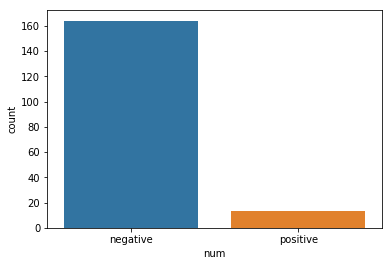

In [24]:
sns.countplot(df.num)


In [26]:
neg = df[df.num == 'negative']
pos = df[df.num == 'positive']

pos_artırılmış = resample(pos,
                                     replace = True,
                                     n_samples = len(neg),
                                     random_state = 111)

artırılmıs_df = pd.concat([neg, pos_artırılmış])
artırılmıs_df.num.value_counts()

positive    164
negative    164
Name: num, dtype: int64

In [27]:
def model_olustur(X, y):
    X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_eğitim, y_eğitim)

    tahmin_eğitim = logreg_model.predict(X_eğitim)
    tahmin_test = logreg_model.predict(X_test)
    hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
    hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
    print("Modelin doğruluk değeri : ",  logreg_model.score(X_test, y_test))
    print("Eğitim veri kümesi")
    print(classification_report(y_eğitim,tahmin_eğitim) )
    print("Test veri kümesi")
    print(classification_report(y_test,tahmin_test) )
    return  None

In [28]:
X = df.drop('num', axis=1)
X=X = pd.get_dummies(data=X, drop_first=True)
y = df['num']
model_olustur(X,y)

Modelin doğruluk değeri :  0.9166666666666666
Eğitim veri kümesi
              precision    recall  f1-score   support

    negative       0.98      0.99      0.99       131
    positive       0.89      0.80      0.84        10

    accuracy                           0.98       141
   macro avg       0.94      0.90      0.92       141
weighted avg       0.98      0.98      0.98       141

Test veri kümesi
              precision    recall  f1-score   support

    negative       0.94      0.97      0.96        33
    positive       0.50      0.33      0.40         3

    accuracy                           0.92        36
   macro avg       0.72      0.65      0.68        36
weighted avg       0.90      0.92      0.91        36



In [29]:
X = artırılmıs_df.drop('num', axis=1)
X=X = pd.get_dummies(data=X, drop_first=True)
y = artırılmıs_df['num']
model_olustur(X,y)

Modelin doğruluk değeri :  0.9393939393939394
Eğitim veri kümesi
              precision    recall  f1-score   support

    negative       1.00      0.94      0.97       131
    positive       0.94      1.00      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test veri kümesi
              precision    recall  f1-score   support

    negative       1.00      0.88      0.94        33
    positive       0.89      1.00      0.94        33

    accuracy                           0.94        66
   macro avg       0.95      0.94      0.94        66
weighted avg       0.95      0.94      0.94        66



In [30]:
y = df.num
X = df.drop('num', axis=1)
X=X = pd.get_dummies(data=X, drop_first=True)

sm = SMOTE(random_state=27, ratio=1.0)
X_smote, y_smote = sm.fit_sample(X, y)
model_olustur(X_smote, y_smote)

Modelin doğruluk değeri :  0.9696969696969697
Eğitim veri kümesi
              precision    recall  f1-score   support

    negative       1.00      0.95      0.98       131
    positive       0.96      1.00      0.98       131

    accuracy                           0.98       262
   macro avg       0.98      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262

Test veri kümesi
              precision    recall  f1-score   support

    negative       1.00      0.94      0.97        33
    positive       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



In [31]:
y = df.num
X = df.drop('num', axis=1)
X=X = pd.get_dummies(data=X, drop_first=True)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, y)
model_olustur(X_adasyn, y_adasyn)

Modelin doğruluk değeri :  0.9545454545454546
Eğitim veri kümesi
              precision    recall  f1-score   support

    negative       1.00      0.95      0.98       131
    positive       0.96      1.00      0.98       132

    accuracy                           0.98       263
   macro avg       0.98      0.98      0.98       263
weighted avg       0.98      0.98      0.98       263

Test veri kümesi
              precision    recall  f1-score   support

    negative       1.00      0.91      0.95        33
    positive       0.92      1.00      0.96        33

    accuracy                           0.95        66
   macro avg       0.96      0.95      0.95        66
weighted avg       0.96      0.95      0.95        66



Doğruluk değerini baz alırsak;  
1-az olan sınıfın sayısını resample ile artırmak  
2-Smote  
3-Adasyn algoritmalarını  
uygulamak seçeneklerinden en iyi sonucu SMOTE algoritmasında aldık.